In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout
from tensorflow import keras

In [112]:
import warnings
warnings.filterwarnings("ignore")

# Data

In [113]:
train = pd.read_csv("location_train.csv")
test = pd.read_csv("location_test.csv")

In [114]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 448 entries, ID to 446
dtypes: int64(448)
memory usage: 13.7 MB


In [115]:
train.head()

,ID,class,1,2,3,4,5,6,7,8,...,437,438,439,440,441,442,443,444,445,446
0,0,11,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,8,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [116]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Columns: 447 entries, ID to 446
dtypes: int64(447)
memory usage: 3.4 MB


In [117]:
test.head()

,ID,1,2,3,4,5,6,7,8,9,...,437,438,439,440,441,442,443,444,445,446
0,4000,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,4001,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,4002,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4003,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,4004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [118]:
X = train.drop(["ID", "class"], axis=1)
y = train["class"]

X_test = test.drop(["ID"], axis=1)

# Pre-processing

In [119]:
y_enc = keras.utils.to_categorical(y-1)

# Model selection

In [124]:
X_train, X_val, y_train, y_val = train_test_split(X, y_enc, test_size=0.3)

model = Sequential([
    Dense(400, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(100, activation='relu'),
    Dense(30, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
88/88 [==============================] - 0s 3ms/step - loss: 2.6654 - accuracy: 0.2875 - val_loss: 1.7034 - val_accuracy: 0.4875
Epoch 2/30
88/88 [==============================] - 0s 2ms/step - loss: 1.0730 - accuracy: 0.6950 - val_loss: 1.2013 - val_accuracy: 0.5967
Epoch 3/30
88/88 [==============================] - 0s 1ms/step - loss: 0.5453 - accuracy: 0.8636 - val_loss: 1.0720 - val_accuracy: 0.6417
Epoch 4/30
88/88 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.9386 - val_loss: 1.0044 - val_accuracy: 0.6600
Epoch 5/30
88/88 [==============================] - 0s 1ms/step - loss: 0.1750 - accuracy: 0.9793 - val_loss: 0.9756 - val_accuracy: 0.6875
Epoch 6/30
88/88 [==============================] - 0s 2ms/step - loss: 0.1039 - accuracy: 0.9961 - val_loss: 1.0172 - val_accuracy: 0.6633
Epoch 7/30
88/88 [==============================] - 0s 2ms/step - loss: 0.0624 - accuracy: 0.9996 - val_loss: 1.0100 - val_accuracy: 0.6733
Epoch 8/30
88/88 [==

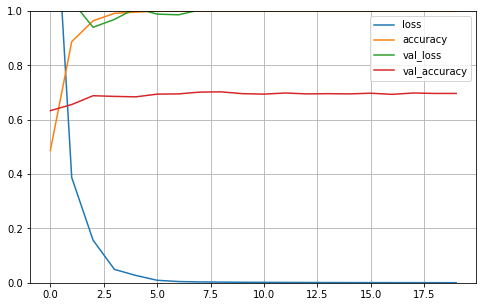

In [99]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Final model

In [ ]:
best_model = model.best_estimator_
best_model.fit(X_train, y_train)

In [ ]:
predictions = pd.DataFrame(test["ID"])
predictions["class"] = best_model.predict(X_test)

In [ ]:
predictions.to_csv("submission.csv", index=False)